Importing library

In [15]:
import os
from astropy.io import fits
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import h5py
from keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


Importing data

In [3]:
hf = h5py.File('/mnt/data/HSC/HSC_v6/extra_files/five_band_image127x127_full.hdf5', 'r')

In [8]:
x = hf["image"][0:5000]
y = hf["specz"][0:5000]

In [9]:
x = np.transpose(x,(0,2,3,1))

In [11]:
## check this
max_value = np.max(x)
max_value

350.76343

In [12]:
x_new = np.true_divide(x,max_value)

In [14]:
hf.close()

Image Augmentation

In [22]:
##datagen = ImageDataGenerator(rotation_range=90)
##it = datagen.flow(x_new, batch_size=1)

/opt/anaconda3/envs/jupyterhub/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (5000, 120, 120, 5) (5 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


In [24]:
x_train ,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2)

In [25]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [28]:
from sklearn.model_selection import train_test_split



model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(127,127,5)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size=(2,2),activation='tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32, kernel_size=(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(500, activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(1))



#model.compile(optimizer='Adam', loss="mse",metrics=[tf.keras.metrics.MeanAbsoluteError()])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 118, 118, 32)      1472      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        4128      
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

In [29]:
model.compile(optimizer='Adam', loss="mse",metrics=[tf.keras.metrics.MeanAbsoluteError()])

model.fit(x_train,y_train,epochs=300,shuffle = True,verbose=1)


Epoch 1/300
125/125 [==============================] - 415s 6ms/step - loss: 0.5782 - mean_absolute_error: 0.5952
Epoch 2/300
125/125 [==============================] - 1s 6ms/step - loss: 0.2012 - mean_absolute_error: 0.3558
Epoch 3/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1474 - mean_absolute_error: 0.3129
Epoch 4/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1335 - mean_absolute_error: 0.2902
Epoch 5/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1294 - mean_absolute_error: 0.2759
Epoch 6/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1193 - mean_absolute_error: 0.2666
Epoch 7/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1161 - mean_absolute_error: 0.2569
Epoch 8/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1094 - mean_absolute_error: 0.2492
Epoch 9/300
125/125 [==============================] - 1s 6ms/step - loss: 0.1156 - mean_absolute_erro

125/125 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0969
Epoch 146/300
125/125 [==============================] - 1s 6ms/step - loss: 9.0135e-04 - mean_absolute_error: 0.0964
Epoch 147/300
125/125 [==============================] - 1s 6ms/step - loss: 9.3961e-04 - mean_absolute_error: 0.0959
Epoch 148/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0012 - mean_absolute_error: 0.0954
Epoch 149/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0949
Epoch 150/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_absolute_error: 0.0944
Epoch 151/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0013 - mean_absolute_error: 0.0939
Epoch 152/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0935
Epoch 153/300
125/125 [==============================] - 1s 6ms/step - loss: 0.0010 - mean_abs

125/125 [==============================] - 1s 6ms/step - loss: 2.3809e-04 - mean_absolute_error: 0.0586
Epoch 285/300
125/125 [==============================] - 1s 6ms/step - loss: 1.7078e-04 - mean_absolute_error: 0.0585
Epoch 286/300
125/125 [==============================] - 1s 6ms/step - loss: 1.3590e-04 - mean_absolute_error: 0.0583
Epoch 287/300
125/125 [==============================] - 1s 6ms/step - loss: 1.5851e-04 - mean_absolute_error: 0.0581
Epoch 288/300
125/125 [==============================] - 1s 6ms/step - loss: 1.5177e-04 - mean_absolute_error: 0.0579
Epoch 289/300
125/125 [==============================] - 1s 6ms/step - loss: 1.6339e-04 - mean_absolute_error: 0.0578
Epoch 290/300
125/125 [==============================] - 1s 6ms/step - loss: 1.3832e-04 - mean_absolute_error: 0.0576
Epoch 291/300
125/125 [==============================] - 1s 6ms/step - loss: 1.8641e-04 - mean_absolute_error: 0.0574
Epoch 292/300
125/125 [==============================] - 1s 6ms/step -

In [30]:
y_test_predict = model.predict(x_test)
y_test_prediction = []

for i in range(len(y_test)):
    y_test_prediction.append(y_test_predict[i][0])

y_test_prediction = np.asarray(y_test_prediction)

y_test_ = []

for i in range(len(y_test)):
    y_test_.append(y_test[i][0])

y_test_ = np.asarray(y_test_)

In [31]:
from photoz_utils import *
y_test_new = pd.Series(y_test_)
y_test_predict_new = pd.Series(y_test_prediction)
get_point_metrics(y_test_predict_new,y_test_new)

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",1000,0.247605,0.0072,0.010582,0.102727,0.084633,0.071,0.194,0.154653


In [32]:
binned_metrics_test = get_point_metrics(y_test_predict_new,y_test_new,binned = True)
plot_point_metrics(binned_metrics_test)

KeyError: Interval(3.2, 3.4, closed='right')

In [33]:
y_train_predict = model.predict(x_train)
y_train_prediction = []

for i in range(len(y_train)):
    y_train_prediction.append(y_train_predict[i][0])

y_train_prediction = np.asarray(y_train_prediction)

y_train_ = []

for i in range(len(y_train)):
    y_train_.append(y_train[i][0])

y_train_ = np.asarray(y_train_)

In [34]:
from photoz_utils import *
y_train_new = pd.Series(y_train_)
y_train_predict_new = pd.Series(y_train_prediction)
get_point_metrics(y_train_predict_new,y_train_new)

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",4000,0.009963,0.012611,0.012515,0.008387,0.00754,0.0205,0.0,0.000641


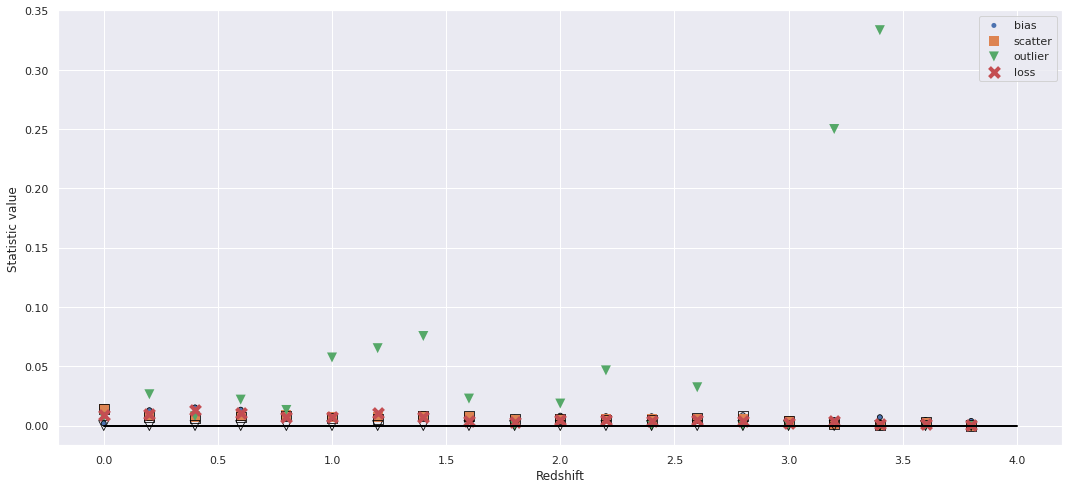

In [35]:
binned_metrics_train = get_point_metrics(y_train_predict_new,y_train_new,binned = True)
plot_point_metrics(binned_metrics_train)

In [36]:
from scipy.stats import gaussian_kde
xy = np.vstack([y_test_,y_test_prediction])
z = gaussian_kde(xy)(xy)

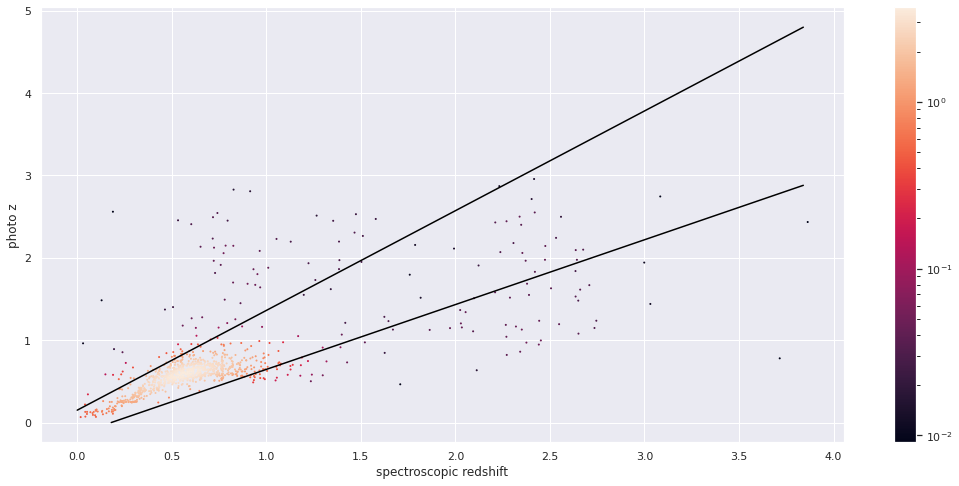

In [37]:
import matplotlib.cm as cm
import matplotlib
fig, ax = plt.subplots()
ax_ = ax.scatter(y_test, y_test_prediction, c=z,s = 1,edgecolor=None, norm=matplotlib.colors.LogNorm())
plt.colorbar(ax_)
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([.18,1.6*2.4],[0,1.2*2.4], color='black')
plt.plot([0, 1.6 * 2.4], [.15, 2 * 2.4],color = 'black')